Семинар 6 (неделя 7): Проверка статистических гипотез
=====

- [Домашнее задание](#HW)

Проверка статистических гипотез – это пятиступенчатая процедура, которая на основании данных выборки и при помощи теории вероятностей позволяет сделать вывод об обоснованности гипотезы.

Другими словами, этот способ проверить, действительны ли результаты, полученные на выборке, и для генеральной совокупности.

__Пошаговый алгоритм:__

1.Формулировка основной и альтернативной гипотезы  

2.Выбор уровня значимости  

3.Определение подходящего статистического критерия  

4.Формулировка правила принятия решения  

5.Принятие решения на основании данных выборки

In [188]:
# Импорт библиотек для работы со статистикой
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels as stm


# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль для графиков
plt.style.use('ggplot')
%matplotlib inline

In [190]:
def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - sts.norm().cdf(np.abs(z_obs)))
        z_crit = sts.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = sts.norm().cdf(z_obs)
        z_crit = sts.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - sts.norm().cdf(z_obs)
        z_crit = sts.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = sts.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = sts.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    print(f'p-value = {p_value:.3}')
    return p_value

$$
\Large \bar X \sim N(\mu, \frac{\sigma^2}{n} )
$$

$$
\Large Z = \frac{\bar x - \mu_0}{ \sqrt{\frac{\sigma_x^2}{n_x}} } \sim N(0; 1)
$$

p-value = 0.211


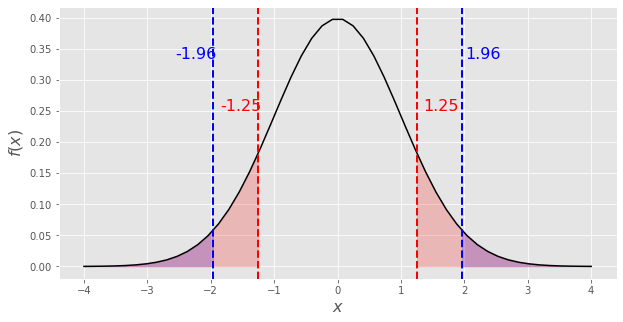

In [191]:
asy_mean_test(mean_hat = 10, std_hat = 4, 
              mu_0 = 5, alpha=0.05, alternative='two-sided', margin = 4);

## 0. Датасет

Бельгийские психологи воплотили дилемму "проблема вагонетки" в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей.

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации.

В файле mouse.csv лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы:

__STUDY:__ какую проблему вагонетки решал человек $1$ если реальную, $2$ если на бумаге  
__AGE:__ возраст респондента  
__GENDER:__ пол респондента  
__DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать)  
__RT:__ время, которое респондент потратил, чтобы нажать на кнопку  

In [192]:
df = pd.read_csv("mouse.csv", sep=";")
df.head()

,STUDY,AGE,GENDER,DECISION,DEO1,DEO2,DEO3,DEO4,DEO5,DEO6,...,AE,MOUSE1,MOUSE2,MOUSE3,MOUSE,DOUBT,OTHERCHOICE,UNCOMFORTABLE,NOSHOCK,RT
0,1,38,1,NaN,2,2,2,1,2,2,...,5.000000,6.0,5.0,5.0,5.333333,NaN,NaN,NaN,NaN,NaN
1,1,22,1,NaN,1,2,2,1,2,1,...,5.727273,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN,NaN
2,1,39,1,NaN,1,1,3,5,3,1,...,5.545455,6.0,6.0,6.0,6.000000,NaN,NaN,NaN,NaN,NaN
3,1,21,0,1.0,2,3,3,3,3,2,...,5.136364,4.0,7.0,7.0,6.000000,2.0,0.0,6.0,80.0,9.212427
4,1,20,0,1.0,4,2,2,2,2,2,...,4.181818,4.0,6.0,6.0,5.333333,4.0,0.0,6.5,75.0,17.071711


In [193]:
# удалим пропуски для тех, кто не решил дилемму
df.dropna(subset=['DECISION'], inplace=True)

---
---

## Гипотезы о среднем и о разнице средних

__Гипотеза:__ Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные?

$$
\begin{aligned}
& H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{Люди кровожадны} \\
& H_1: \hspace{2mm} \mu \gt 5  \hspace{2mm} \text{Люди не кровожадны}
\end{aligned}
$$

$$
\Large Z = \frac{\bar x - \mu}{ \sqrt{\frac{s_x^2}{n_x}} } \sim N(0; 1)
$$

In [194]:
# Асимптотический критерий
x = df['RT'].dropna().values         # выборка

alpha = 0.05                         # уровень значимости = 5%
n = x.size                           # размер выборки
mu = x.mean()                        # среднее значение
std = x.std(ddof=1)/np.sqrt(n)       # стандартное отклонение

z_obs = (mu - 5)/std                 # наблюдаемое значение статистики 
z_crit = sts.norm.ppf(1 - alpha)   # критическое значение статистики

print(f'Наблюдаемое значение {z_obs:.3} больше критического {z_crit:.3} \
      => нулевая гипотеза отвергается')

Наблюдаемое значение 13.0 больше критического 1.64       => нулевая гипотеза отвергается


p-value = 0.0


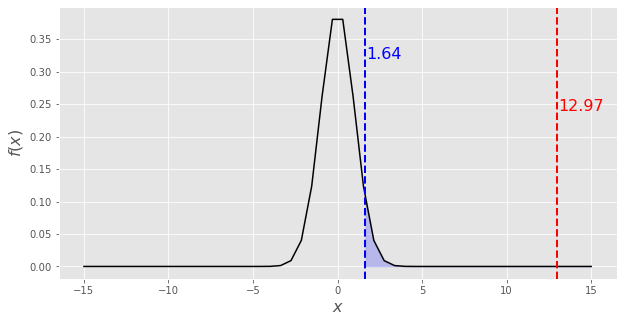

In [195]:
asy_mean_test(mu, std, mu_0 = 5, alpha = 0.05, 
              margin = 15, alternative='larger');

In [196]:
mu

10.116762704819276

Вычислим средствами пакета statsmodels

In [197]:
from statsmodels.stats.weightstats import ztest

z_obs, p_val = ztest(x, value=5, alternative='larger')

print(f"Наблюдаемое значение: {z_obs:.7}") 
print(f"P-значение: {p_val:.3}")

Наблюдаемое значение: 12.9749
P-значение: 8.49e-39


In [198]:
t_obs = (mu - 5)/std                     # наблюдаемое значение статистики 
t_crit = sts.t(n - 1).ppf(1 - alpha)   # критическое значение статистики

print(f'Наблюдаемое значение {t_obs:.4} больше критического {t_crit:.4} \
      => нулевая гипотеза отвергается')

Наблюдаемое значение 12.97 больше критического 1.654       => нулевая гипотеза отвергается


Каким тестом пользоваться? Точным или асимптотическим?

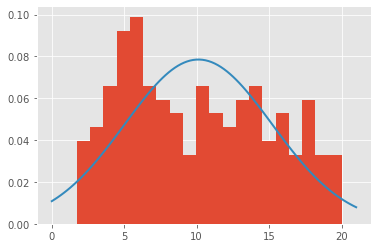

In [199]:
plt.hist(x, density=True, bins=20)

xs = np.linspace(0,21,100)
pdf = sts.norm(x.mean(), x.std(ddof=1)).pdf(xs)
plt.plot(xs, pdf, lw=2);

Распределение не похоже на нормальное. Bоспользуемся тестом Колмогорова-Смирнова и проверим гипотезу о нормальности распределения колонки RT.

In [200]:
sts.kstest(x, 'norm', args=(df['RT'].mean(), df['RT'].std(ddof=1)))

KstestResult(statistic=0.10581791163988818, pvalue=0.045074232278964566)

Видим, что pvalue очень низкое, это говорит о том, что гипотеза о нормальности выборки отвергается.

> __Вывод:__ гипотеза о том, что люди кровожадные отвергается. Гипотезу тестируем с помощью асимптотического критерия, так как наблюдений много, а распределение отличается от нормального.

---

__Гипотеза:__ Правда ли, что женщины намного кровожаднее мужчин и жмут на кнопку гораздо быстрее?

In [201]:
men = df[(df['GENDER'] == 1)]['RT'].dropna().values
women = df[(df['GENDER'] == 0)]['RT'].dropna().values

In [202]:
men.mean(), women.mean()

(9.373347263157894, 10.505521238532111)

Выше мы увидели, что в данных нет нормальности. Поэтому используем асимптотический тест:  

$$
\Large Z = \frac{\bar x - \bar y}{ \sqrt{\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y}} } \sim N(0; 1)
$$

In [204]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = women.size, men.size                                   # размер выборок

diff = women.mean() - men.mean()                                # разность средних
diff_std = np.sqrt(women.var(ddof=1)/nx + men.var(ddof=1)/ny)   # стандартное отклонение

z_obs = diff/diff_std                                           # наблюдаемое значение
z_crit = sts.norm.ppf(1 - alpha)                              # критическое значение

print(f'Наблюдаемое значение {z_obs:.5} меньше критического {z_crit:.3} \
      => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.376 меньше критического 1.64       => нулевая гипотеза не отвергается


p-value = 0.0844


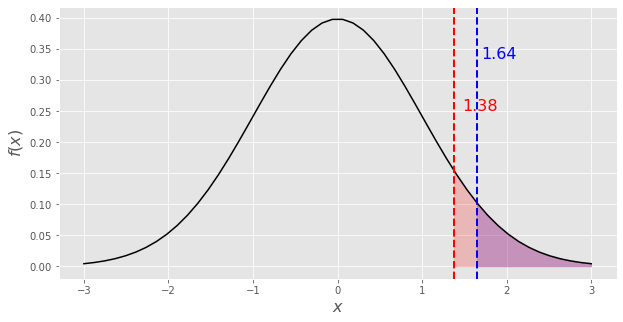

In [205]:
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger');

---

___Eсли бы с нормальностью выборки всё было хорошо___  
_Тест Стьюдента (неизвестные равные дисперсии)_  

$$
\Large t = \frac{\bar x - \bar y}{ \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}} } \sim t_{crit}(n+m-2)
$$

$$
\Large s^2 = \frac{(n-1)s_x^2 + (m-1)s_y^2}{(n-1)+(m-1)}
$$

In [206]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = women.size, men.size                                   # размер выборок
diff = women.mean() - men.mean()                                # разность средних

diff_var = ((nx - 1)*women.var(ddof=1) + (ny - 1)*men.var(ddof=1))/(nx + ny - 2)
diff_std = np.sqrt(diff_var/nx + diff_var/ny)                   # стандартное отклонение

t_obs = diff/diff_std                                           # наблюдаемое значение
t_crit = sts.t(df = nx + ny - 2).ppf(1 - alpha)               # критическое значение

print(f'Наблюдаемое значение {t_obs:.3} меньше критического {t_crit:.3} \
      => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.37 меньше критического 1.65       => нулевая гипотеза не отвергается


_То же самое средствами statsmodels:_

In [207]:
from statsmodels.stats.weightstats import ttest_ind

t_obs, p_val, _ = ttest_ind(women, men, value=0, alternative='larger')

print(f"Наблюдаемое значение: {t_obs:.3}") 
print(f"P-значение: {p_val:.3}")

Наблюдаемое значение: 1.37
P-значение: 0.0868


_Тест Уэлча (неизвестные разные дисперсии)_

$$
\Large t = \frac{\bar x - \bar y}{ \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}} } \sim t_{crit}(\nu)
$$

$$
\Large \nu =  \left( \frac{s_x^2}{n_x} + \frac{s_y^2}{n_y} \right)^2 \big/ \left( \frac{s_x^4}{n_x^2(n_x-1)} + \frac{s_y^4}{n_y^2(n_y-1)} \right)
$$


In [208]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = women.size, men.size                                   # размер выборок

diff = women.mean() - men.mean()                                # разность средних
diff_std = np.sqrt(women.var(ddof=1)/nx + men.var(ddof=1)/ny)   # стандартное отклонение

t_obs = diff/diff_std                                           # наблюдаемое значение

# число степеней свободы
u = (women.var(ddof=1) / nx + men.var(ddof=1) / ny) ** 2
d = (women.var(ddof=1)**2) / (nx**2 * (nx - 1)) + (men.var(ddof=1)**2)/ (ny**2* (ny - 1))
nu =  u/d 

t_crit = sts.t(nu).ppf(1 - alpha)                             # критическое значение

print(f'Наблюдаемое значение {t_obs:.3} меньше критического {t_crit:.3} \
      => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.38 меньше критического 1.66       => нулевая гипотеза не отвергается


In [209]:
women.std(ddof=1), men.std(ddof=1)

(5.103972224167936, 4.996830829492463)

In [210]:
nx, ny # направление знака между наблюдениями соотвествует знаку между дисперсиями

(109, 57)

_То же самое средствами statsmodels:_

In [211]:
from statsmodels.stats.weightstats import ttest_ind

# usevar опционально думает, что дисперсии одинаковые
t_obs, p_val, _ = ttest_ind(women, men, value=0, 
                            alternative='larger', usevar='unequal')

print(f"Наблюдаемое значение: {t_obs:.3}") 
print(f"P-значение: {p_val:.3}")

Наблюдаемое значение: 1.38
P-значение: 0.0857


---

---

## Гипотеза о дисперсии и об отношении дисперсий

Перед экспериментом каждый участник проходил психологический тест. Для каждого человека рассчитывалось довольно большое число параметров, описывающих его психотип. Например, в колонках EC находится оценка способности человека к эмпатии (Empathic concern), в колонке AE находится оценка эмпатии человека к животным.

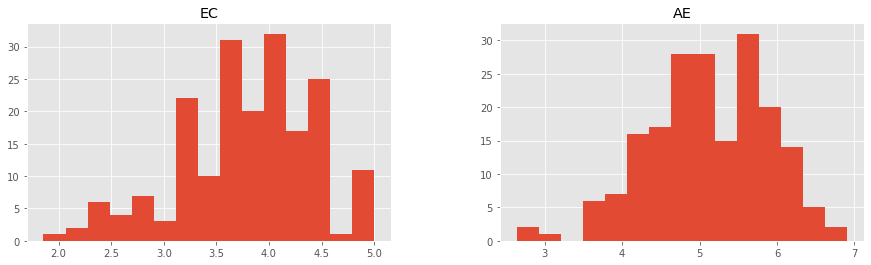

In [212]:
df[['EC', 'AE']].hist(bins=15, figsize=(15,4));

Масштабируем данные на отрезок [0; 1] для сравнения:

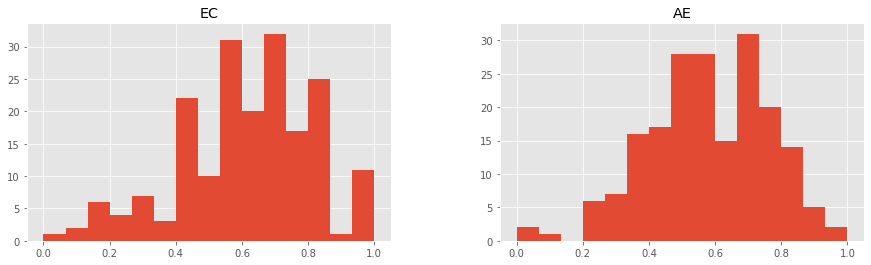

In [213]:
df['EC'] = (df['EC'] - df['EC'].min())/(df['EC'].max() - df['EC'].min())
df['AE'] = (df['AE'] - df['AE'].min())/(df['AE'].max() - df['AE'].min())

df[['EC', 'AE']].hist(bins=15, figsize=(15,4));


Правда ли, что неоднородность людей в плане их эмпатии к животным намного выше неоднородности в плане обычной эмпатии?

$$
\begin{aligned}
& H_0: \hspace{2mm} \sigma^2_1 = \sigma^2_2 \hspace{2mm} \text{Неоднородность одинаковая} \\
& H_1: \hspace{2mm} \sigma^2_1 < \sigma^2_2  \hspace{2mm} \text{Неоднородность для животных выше}
\end{aligned}
$$

Распределения нормальные, можем использовать F-статистику:

$$
F = \frac{\sigma_x^2 \cdot s_y^2}{\sigma_y^2 \cdot s_x^2} \sim F_{1-\frac{\alpha}{2}}(n_y-1, n_x-1) 
$$

$$
\text{если  } \sigma_x^2 = \sigma_y^2, \text{   то  } F = \frac{s_y^2}{s_x^2}
$$

In [214]:
ec = df['EC'].dropna().values
ae = df['AE'].dropna().values

ec.mean(), ae.mean()

(0.6190814394131477, 0.5798980496933709)

In [215]:
ec.var(ddof = 1), ae.var(ddof = 1)

(0.04269876672541116, 0.032214701849814856)

In [216]:
alpha = 0.05                             # уровень значимости = 5%
nx, ny = ec.size, ae.size                # размер выборок

F_obs = ec.var(ddof = 1)/ae.var(ddof = 1)  # наблюдаемое значение

f_rv = sts.f(nx - 1, ny - 1) 
F_crit = f_rv.ppf(1 - alpha)           # критическое значение

print(f'Наблюдаемое значение {F_obs:.5} больше критического {F_crit:.5} \
      => нулевая гипотеза отвергается')

Наблюдаемое значение 1.3254 больше критического 1.2695       => нулевая гипотеза отвергается


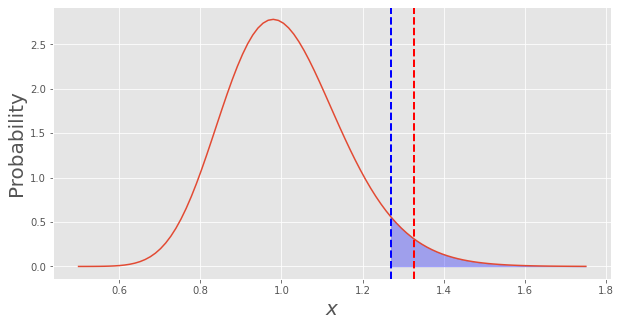

In [218]:
plt.figure(figsize=(10, 5))

x_f = np.linspace(0.5, 1.75, 100)
pdf = f_rv.pdf(x_f)
plt.plot(x_f, pdf)

#left = f_rv.ppf(alpha/2)
#xq_l = np.linspace(0.5, left)
#yq_l = f_rv.pdf(xq_l)
#right = f_rv.ppf(1 - alpha/2)
right = F_crit
xq_u = np.linspace(right, 1.75)
yq_u = f_rv.pdf(xq_u)


#plt.fill_between(xq_l, 0, yq_l, color='blue', alpha=0.3)
plt.fill_between(xq_u, 0, yq_u, color='blue', alpha=0.3)

plt.axvline(F_obs, color='red', linestyle="--", lw=2)
plt.axvline(right, color='blue', linestyle="--", lw=2);

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20);

## Зависимые выборки

Сравниваются одни и те же объекты до и после какого-то воздействия:

$$
X_1, \ldots , X_n
$$

$$
Y_1, \ldots, Y_n
$$

$$
d_i = X_i - Y_i
$$

$$
\bar d = \bar X - \bar Y = \overline{X - Y}
$$

Имеется датасет cr.csv с результатами контрольной работы, проведённой на факультете. Проверим, изменилась ли успеваемость студентов.

In [219]:
df_control = pd.read_csv('cr.csv', sep=';')
df_control.tail()

,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
384,eds_python_2020_384,1.0,0.0,10.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,13.0,20.0,0.0,NaN,3.3,35.0,55.0,4.0,9.4
385,eds_python_2020_385,3.0,NaN,NaN,NaN,NaN,4.0,NaN,0.4,NaN,NaN,NaN,NaN,20.0,NaN,2.0,35.0,0.0,5.0,4.0
386,eds_python_2020_386,1.0,10.0,10.0,20.0,NaN,10.0,12.0,6.2,NaN,NaN,7.0,15.0,10.0,15.0,4.7,25.0,40.0,15.0,8.0
387,eds_python_2020_387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
388,eds_python_2020_388,0.0,10.0,10.0,7.0,30.0,NaN,12.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0,0.0,5.0,2.9


__Описание колонок:__

__contest_login__ - уникальный идентификатор студента  
__fraud__ - в списывании скольки задач был уличён студент  
__k1__ - результат за первую контрольную, k1a - k1f в разбивке по задачам  
__k2__ - результат за вторую контрольную, k2a - k2f в разбивке по задачам  
__k3__ - результат за третью контрольную, k3a - k3с в разбивке по задачам  

Получим выборку разниц оценок за вторую и первую контрольные, поставив 0 баллов, если работа не была написана:

In [220]:
k_1 = df_control.k1.fillna(0)
k_2 = df_control.k2.fillna(0)
k_1.var(ddof=1), k_2.var(ddof=1)

(10.00703773884928, 10.601474438820155)

$$
\begin{aligned}
& H_0: \hspace{2mm} \bar d = \bar k_1 - \bar k_2 = 0 \hspace{2mm} \text{Успеваемость не изменилась} \\
& H_1: \hspace{2mm} \bar d = \bar k_1 - \bar k_2 > 0  \hspace{2mm} \text{Успеваемость упала}
\end{aligned}
$$

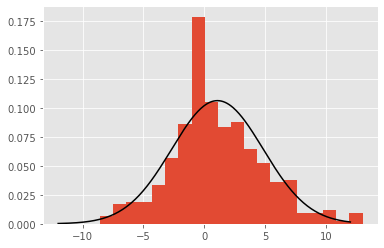

In [221]:
d = k_1 - k_2
d_mean = d.mean()
d_std = d.std(ddof=1)

plt.hist(d, bins=20, density=True)

xs = np.linspace(-12, 12, 300)
ys = sts.norm(loc=d_mean, scale=d_std).pdf(xs)
plt.plot(xs, ys, color="black");

Распределение разности оценок похоже на нормальное. Можем использовать тест Стьюдента.

$$
t = \frac{\bar x - \bar y}{ \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}} } \sim t_{crit}(n+m-2)
$$

$$
s^2 = \frac{(n-1)s_x^2 + (m-1)s_y^2}{(n-1)+(m-1)}
$$

In [222]:
alpha = 0.05                                                    # уровень значимости = 5%
n_1, n_2 = k_1.size, k_2.size                                   # размер выборок
diff = k_1.mean() - k_2.mean()                                # разность средних

diff_var = ((n_1 - 1)*k_1.var(ddof=1) + (n_2 - 1)*k_2.var(ddof=1))/(n_1 + n_2 - 2)
diff_std = np.sqrt(diff_var/n_1 + diff_var/n_2)                   # стандартное отклонение

t_obs = diff/diff_std                                           # наблюдаемое значение
t_crit = sts.t(df = n_1 + n_2 - 2).ppf(1 - alpha)               # критическое значение

print(f'Наблюдаемое значение {t_obs:.3} больше критического {t_crit:.3} \
      => нулевая гипотеза отвергается')

Наблюдаемое значение 4.7 больше критического 1.65       => нулевая гипотеза отвергается


p-value = 1.3e-06


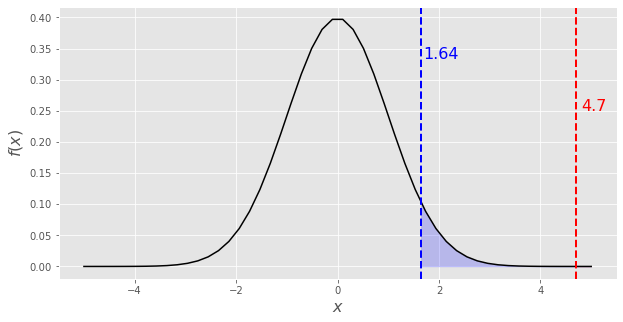

In [223]:
asy_mean_test(diff, diff_std, mu_0 = 0, alpha = 0.05, 
              margin = 5, alternative='larger');

In [224]:
# тест для зависимых выборок 
x = df_control.k1.fillna(0)
y = df_control.k2.fillna(0)

sts.ttest_rel(x, y, alternative='greater')

Ttest_relResult(statistic=5.678488097412358, pvalue=1.3336636632234913e-08)

In [225]:
d = df_control.k1.fillna(0) - df_control.k2.fillna(0)
sts.ttest_1samp(d, 0, alternative='greater')

Ttest_1sampResult(statistic=5.678488097412358, pvalue=1.3336636632234913e-08)

---
---

## Случай с долями

Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

In [226]:
paper = df[df['STUDY'] == 1].DECISION.values
real = df[df['STUDY'] == 2].DECISION.values

paper

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [227]:
paper.mean(), real.mean()

(0.8645833333333334, 0.7469879518072289)

Проверка гипотезы о равенстве долей. Выборки независимые.

$$
\begin{aligned}
& H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{На бумаге и в реальности жмут на кнопку одинаково часто} \\
& H_1: \hspace{2mm} p_1 \ne p_2  \hspace{2mm} \text{Есть различия}
\end{aligned}
$$

>Предпосылки: нет выбросов, много наблюдений. Наблюдения независимы. Тогда сможем использовать ЦПТ.

In [228]:
alpha = 0.05                                       # уровень значимости = 5%
n1,n2 = paper.size, real.size                      # размеры выборок
m1,m2 = paper.sum(), real.sum()                    # число успехов

p1, p2 = paper.mean(), real.mean()                 # точеные оценки долей 
diff = p1 - p2                                     # разность долей

P = (m1 + m2)/(n1 + n2)          
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))        # стандартное отклонение разности
                                    
z_obs = diff/diff_std                              # наблюдаемое значение статистики 
z_crit = sts.norm.ppf(1 - alpha/2)               # критическое значение статистики

print(f'{z_obs:.3} не попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза отвергается')

2.38 не попадает в (-1.96 , 1.96) => Нулевая гипотеза отвергается


p-value = 0.0087


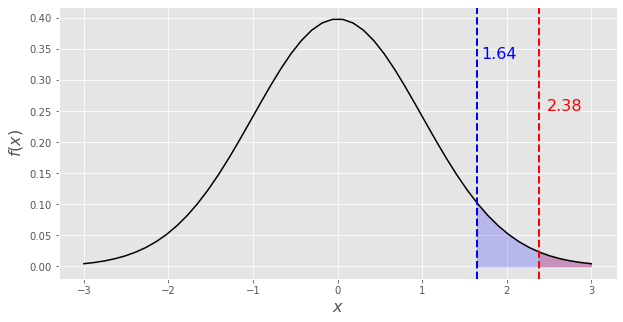

In [229]:
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger');

То же самое средствами statsmodels.

In [230]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05                                       # уровень значимости = 5%
n_obs = paper.size, real.size                      # размеры выборок
m_obs = paper.sum(), real.sum()                    # число успехов

z_obs, p_val =  proportions_ztest(m_obs, n_obs, value=0, 
                                  alternative='larger')

print(f"Наблюдаемое значение: {z_obs:.3}") 
print(f"P-значение: {p_val:.3}")

Наблюдаемое значение: 2.38
P-значение: 0.0087


## Ошибки 1 и 2 рода

__Уровень значимости (ошибка первого рода)__ - вероятность отвергнуть гипотезу $H_0$, когда она верна. Попробуем с помощью симуляций вычислить её для проверки гипотезы о среднем.

Когда мы проверяем гипотезу, мы фиксируем уровень значимости. Давайте убедимся, что он действительно оказывается таким, каким мы его зафиксировали.

__Ошибка второго рода__ - вероятность не отвергнуть гипотезу $H_0$, когда она неверна.

Ошибку второго рода мы минимизируем по остаточному принципу.

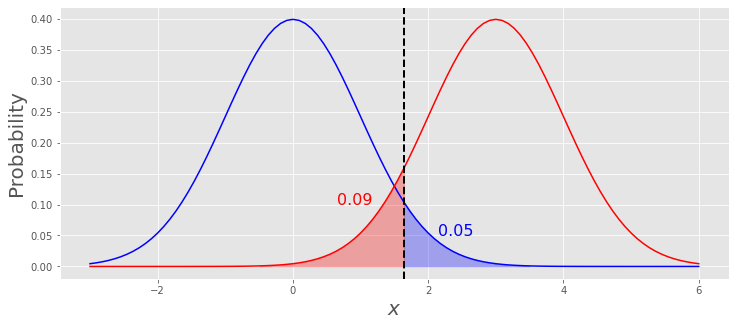

In [231]:
plt.figure(figsize=(12, 5))

x = np.linspace(-3,6,100)

H_0 = sts.norm(0, 1)
pdf_0 = H_0.pdf(x)
plt.plot(x, pdf_0, color = 'blue')

H_1 = sts.norm(3, 1)
pdf_1 = H_1.pdf(x)
plt.plot(x, pdf_1, color = 'red')

alpha = 0.05
Z_crit = H_0.ppf(1 - alpha)
plt.axvline(Z_crit, color='black', linestyle="--", lw=2)

xq_u = np.linspace(Z_crit, 3.5)
yq_u = H_0.pdf(xq_u)
plt.fill_between(xq_u, 0, yq_u, color='blue', alpha=0.3)
plt.text( Z_crit*1.3, 0.05, alpha, color='blue', fontsize=16)

beta = H_1.cdf(Z_crit)

xq_d = np.linspace(-0.5, Z_crit)
yq_d = H_1.pdf(xq_d)
plt.fill_between(xq_d, 0, yq_d, color='red', alpha=0.3)
plt.text( Z_crit - 1, 0.1, round(beta, 2), color='red', fontsize=16)

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20);

# Домашнее задание <a class="anchor" id="HW"></a>

__Упражнение 1.__
У женщин из среднего класса средний вес детей при рождении 3300 г, а у женщин, живущих за чертой бедности - 2800 г. 25 женщин, живущих за чертой бедности, участвовали в экспериментальной программе ведения беременности. Средний вес их детей составил 3075 г, стандартное отклонение 500 г. Эффективна ли названная программа?
>_При решении задачи считать, что вес детей распределён нормально._

__Упражнение 2.__
Исследователь Андрей считает, что аварии в шахтах Великобритании происходят с интенсивностью $3$ штуки за год. Проверьте на $5\%$ уровне значимости гипотезу об этом.

>_Если выборка не распределена нормально, то использовать асимптотический критерий_

__Упражнение 3.__
Есть данные (seattle.csv) о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002. Изменились ли в среднем цены?

__Упражнение 4.__
В таблице ADHD.csv данные о том, как 24 ребёнка прошли тест на способность к подавлению импульсивных поведенческих реакций после недели приёма метилфенидата (первый столбец) и после недели приёма плацебо (второй столбец). Каков эффект препарата?

>_Чем больше балл, полученный ребёнком, тем лучше, то есть, говорит о пользе терапии_

__Упражнение 5.__
Вашему вниманию представлены результаты прыжков в длину Петра Егорова на двух соревнованиях. На первых среди болельщиц присутствовала Аня Иванова (его первая любовь). На вторых Аня среди болельщиц не присутствовала. Проверьте гипотезу, состоящую в том, что отсуствие Ани позволяет Васе лучше сконцентрировтаься и прыгать с большей точностью (меньшим разбросом значений).

first  = [1.83, 1.64, 2.27, 1.78, 1.89, 2.33, 1.61, 2.31]  
second = [2.05, 1.07, 1.59, 1.96, 1.29, 1.52, 1.18, 1.47]